<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week6/Day4/Daily_Challenge/Advanced_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:


# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


1. Data Transformation:

Goal: Prepare the data for analysis by applying transformations.
Steps and Hints:
Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.

Logarithmic Scaling (Optional): Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.

Fourier Transformation: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.

Tools: Explore np.fft.fft for Fourier transformation.

In [11]:
# Step 1: Calculate mean and standard deviation
means = np.mean(ninja_data, axis=0)  # Calculate mean along columns (axis=0)
stds = np.std(ninja_data, axis=0)    # Calculate standard deviation along columns (axis=0)

data_centered = ninja_data - means

normalized_data = data_centered / stds

In [12]:
norm = np.linalg.norm(ninja_data)     # To find the norm of the array
print("df normalized", norm)
print("df mean", norm.mean())
print("df standar deviation", norm.std())

df normalized 32096.92300021508
df mean 32096.92300021508
df standar deviation 0.0


In [13]:
fourier = np.fft.fft(normalized_data)
fourier

array([[-0.23791558+0.j        , -3.17593736-0.45957541j,
        -0.33148819+0.j        , -3.17593736+0.45957541j],
       [-0.37405383+0.j        , -3.19606604-0.25866636j,
        -0.14123617+0.j        , -3.19606604+0.25866636j],
       [-0.08512412+0.j        , -3.09965234-0.0597767j ,
        -0.60913685+0.j        , -3.09965234+0.0597767j ],
       ...,
       [ 3.03525513+0.j        ,  0.30622188-0.10912956j,
         3.24586677+0.j        ,  0.30622188+0.10912956j],
       [ 2.68414524+0.j        ,  0.40094875-0.04250512j,
         3.42137934+0.j        ,  0.40094875+0.04250512j],
       [ 2.99655844+0.j        ,  0.41621081+0.03968773j,
         3.09229843+0.j        ,  0.41621081-0.03968773j]])

2. Statistical Analysis:

Goal: Extract statistical insights from the data.
Steps and Hints:

Descriptive Statistics: Use pandas describe() function to get an overview of the data.

Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.

Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.

Tools: Explore scipy.stats for advanced statistical functions.

In [14]:
ninja_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   float64
 1   Temperature             1000 non-null   float64
 2   Pressure                1000 non-null   float64
 3   Chemical Concentration  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [15]:
ninja_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,1000.0,50.000000,28.910854,0.000000,25.000000,50.000000,75.000000,100.000000
Temperature,1000.0,19.977372,3.574943,13.897407,16.386984,20.008666,23.570373,26.030294
Pressure,1000.0,1013.033617,14.203350,990.284418,998.852247,1012.950967,1027.062114,1035.471676
Chemical Concentration,1000.0,4.989754,1.436505,2.559310,3.576024,4.970976,6.398067,7.486763


In [16]:
corr = ninja_data.corr()
print(corr)

                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  
Time                                 -0.156113  
Temperature                          -0.003277  
Pressure                             -0.000863  
Chemical Concentration                1.000000  


For most of the variables, the correlation is not significant besides the one between time and temperature. Seems that as higher is the temperature less will be the time.

3. Data Visualization:

Goal: Create visual representations of your findings.
Steps and Hints:
Heatmaps: Use heatmaps to visualize correlation matrices.

Multi-dimensional Scatter Plots: Create scatter plots for pairs of variables to explore their relationships.

Fourier Transform Visualizations: Plot the amplitude vs. frequency graphs for the Fourier transformed data.

Tools: Utilize matplotlib and seaborn for creating plots.

<Axes: >

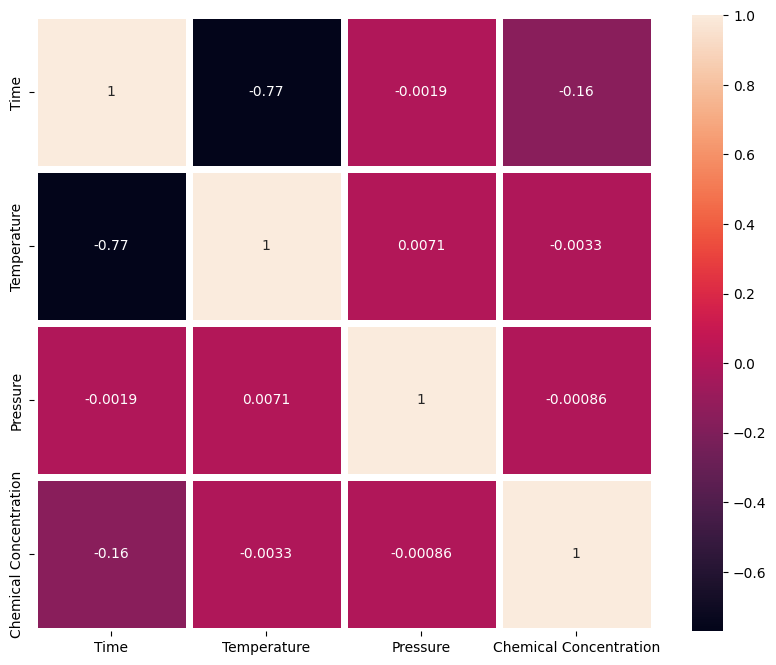

In [27]:
f = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True,  linewidths=5)

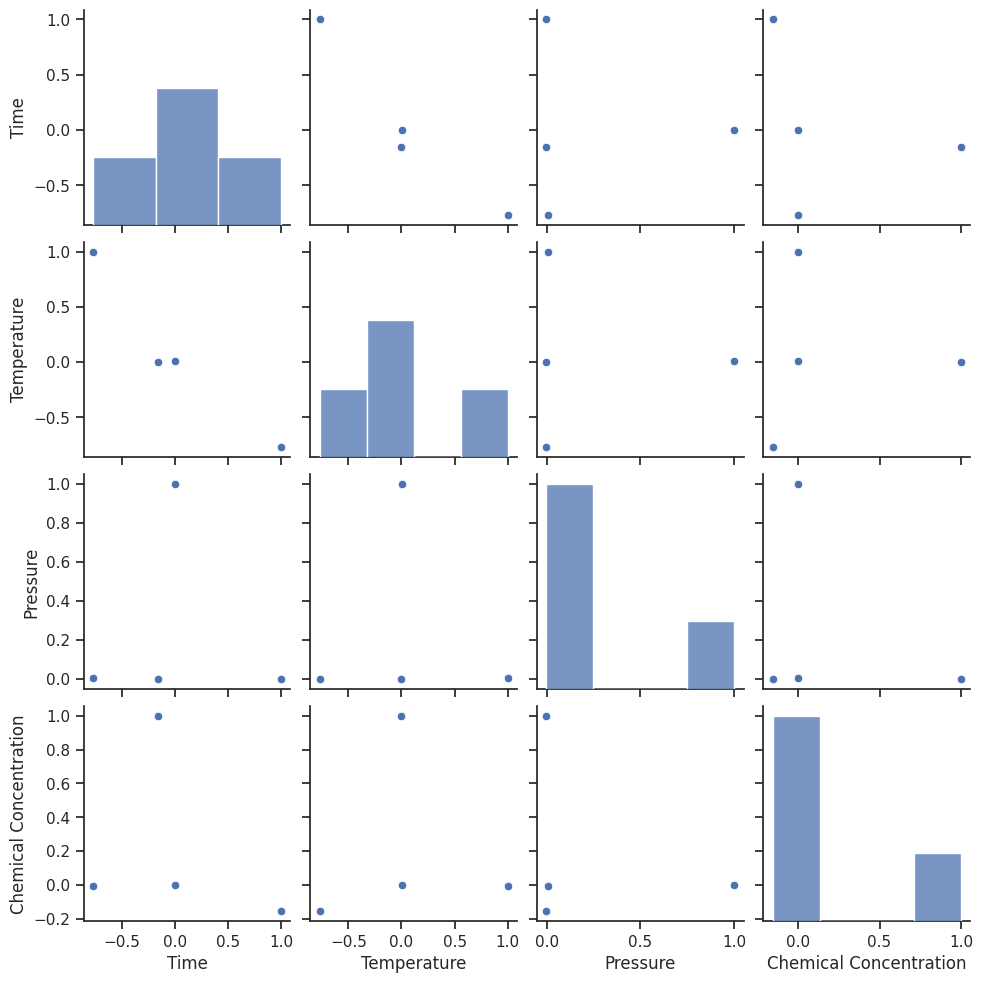

In [31]:
sns.set_theme(style="ticks")

sns.pairplot(corr)

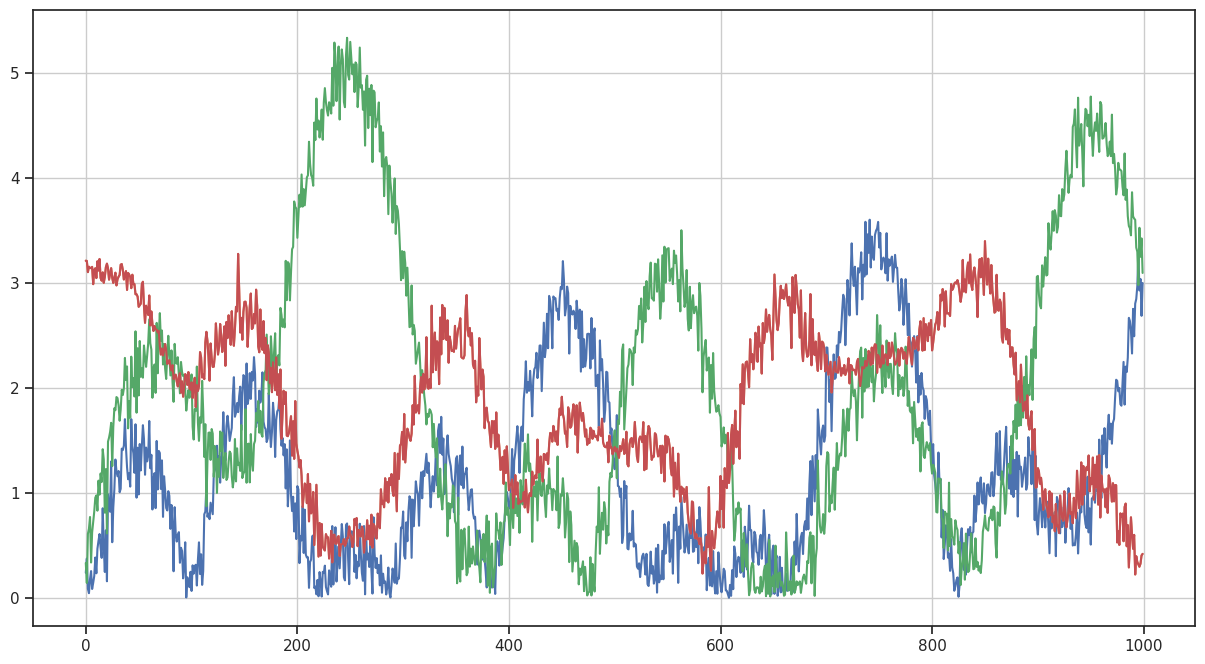

In [39]:
# Plot the amplitude vs. frequency graph
f = plt.subplots(figsize=(15,8))
plt.plot( np.abs(fourier))  # Plot the absolute value of the Fourier transform

plt.grid(True)


plt.show()